## Tópico Complementarar Módulo 13: Shapley Values

In [44]:
import pandas as pd
import shap

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

### Carga do Dados

In [45]:
# carregar os dados - regressão
df_shapley = pd.read_csv(filepath_or_buffer='../../datasets/dataset_colesterol.csv')

# visualizar estrutura de dados
df_shapley

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23
...,...,...,...,...,...,...,...,...
995,996,AB,Sim,Moderado,31.0,68.1,166.0,206.81
996,997,O,Não,Alto,51.0,47.7,170.0,128.03
997,998,AB,Não,Baixo,39.0,85.5,176.0,211.14
998,999,AB,Sim,Baixo,61.0,91.2,161.0,284.53


In [46]:
# coletar medidas de variáveis categóricas
moda_grupo_sanguineo = df_shapley["Grupo Sanguíneo"].mode()
moda_fumante = df_shapley["Fumante"].mode()
moda_nivel_atividade_fisica = df_shapley["Nível de Atividade"].mode(
)

# coletar medidade de variáveis numéricas
mediana_idade = df_shapley["Idade"].median()
mediana_peso = df_shapley["Peso"].median()
mediana_altura = df_shapley["Altura"].median()

# imputar valores ausentes
df_shapley.fillna(
    value={
        "Grupo Sanguíneo": moda_grupo_sanguineo[0],
        "Fumante": moda_fumante[0],
        "Nível de Atividade": moda_nivel_atividade_fisica[0],
        "Idade": mediana_idade,
        "Peso": mediana_peso,
        "Altura": mediana_altura,
    },
    inplace=True,
)

In [47]:
# detectar quantidade valores ausentes (nulos) por coluna
df_shapley.isna().sum()

Id                    0
Grupo Sanguíneo       0
Fumante               0
Nível de Atividade    0
Idade                 0
Peso                  0
Altura                0
Colesterol            0
dtype: int64

In [48]:
# ajustar dataframe
df_shapley.drop(labels="Id", axis=1, inplace=True)

# aplicar OneHotEnconding nas variáveis categóricas
df_shapley = pd.get_dummies(
    data=df_shapley, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

# exibir dataframe atualizado
df_shapley.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   float64
 1   Peso                         1000 non-null   float64
 2   Altura                       1000 non-null   float64
 3   Colesterol                   1000 non-null   float64
 4   Grupo Sanguíneo_A            1000 non-null   uint8  
 5   Grupo Sanguíneo_AB           1000 non-null   uint8  
 6   Grupo Sanguíneo_B            1000 non-null   uint8  
 7   Grupo Sanguíneo_O            1000 non-null   uint8  
 8   Fumante_Não                  1000 non-null   uint8  
 9   Fumante_Sim                  1000 non-null   uint8  
 10  Nível de Atividade_Alto      1000 non-null   uint8  
 11  Nível de Atividade_Baixo     1000 non-null   uint8  
 12  Nível de Atividade_Moderado  1000 non-null   uint8  
dtypes: float64(4), uint

In [49]:
# separar x e y
X = df_shapley.drop(labels='Colesterol', axis=1)
y = df_shapley['Colesterol']

# treinar modelo de regressão linar múltipla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [50]:
# treinar modelo
model_shapley = LinearRegression()
model_shapley.fit(X=X_train, y=y_train)

LinearRegression()

### Shapley Values - Regressão

Nesta aula, vamos aprender sobre uma técnica chamada Shapley Values, que nos permite interpretar os modelos que estamos desenvolvendo. Vamos usar o Shapley Values para medir a importância e contribuição de cada variável em nosso modelo. Vamos mostrar como aplicar essa técnica em um conjunto de dados usando o pandas, shap, matplotlib e sklearn. Vamos treinar um modelo de regressão linear e logistic regression, dividir os dados em treino e teste, e em seguida, aplicar o Shapley Values para interpretar os resultados. Vamos mostrar como plotar gráficos de barras, waterfall, heatmap e beeswarm para visualizar a contribuição das variáveis em diferentes instâncias do conjunto de testes. Essa técnica nos ajuda a entender como cada variável influencia o modelo e pode ser útil para interpretar os resultados de regressão e classificação.

In [51]:
# rodar o explaniner no conjunto de treinamento
explainer_reg = shap.Explainer(model=model_shapley.predict, masker=X_train)

# calcular shapley values no conjunto de testes
shap_values_reg = explainer_reg(X_test)

PermutationExplainer explainer: 301it [00:12,  4.32it/s]                         


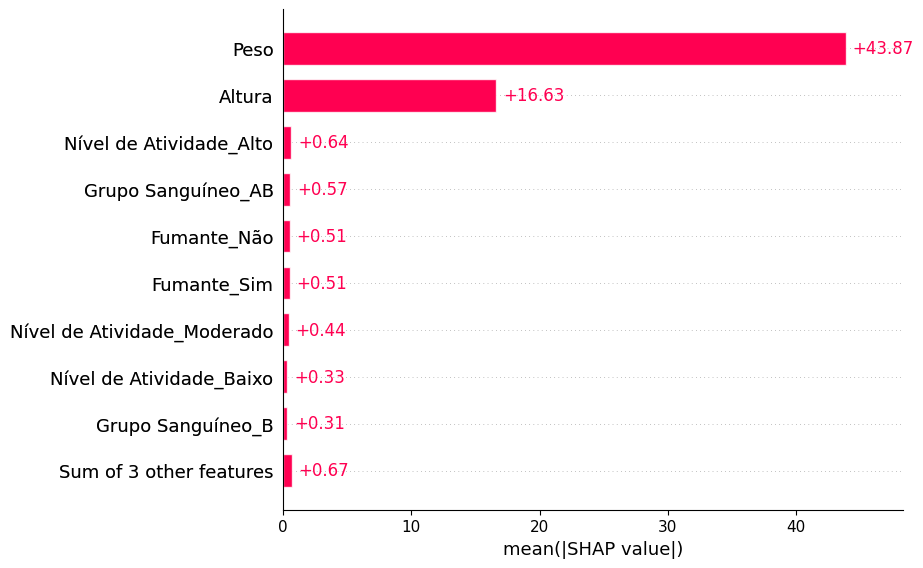

In [52]:
# Plotar a contribuição geral por shap values
shap.plots.bar(shap_values_reg)

In [53]:
# mostrar a primeira instância do conjunto de testes
X_test.iloc[0,:]

Idade                           29.0
Peso                            87.8
Altura                         179.0
Grupo Sanguíneo_A                0.0
Grupo Sanguíneo_AB               1.0
Grupo Sanguíneo_B                0.0
Grupo Sanguíneo_O                0.0
Fumante_Não                      1.0
Fumante_Sim                      0.0
Nível de Atividade_Alto          0.0
Nível de Atividade_Baixo         1.0
Nível de Atividade_Moderado      0.0
Name: 833, dtype: float64

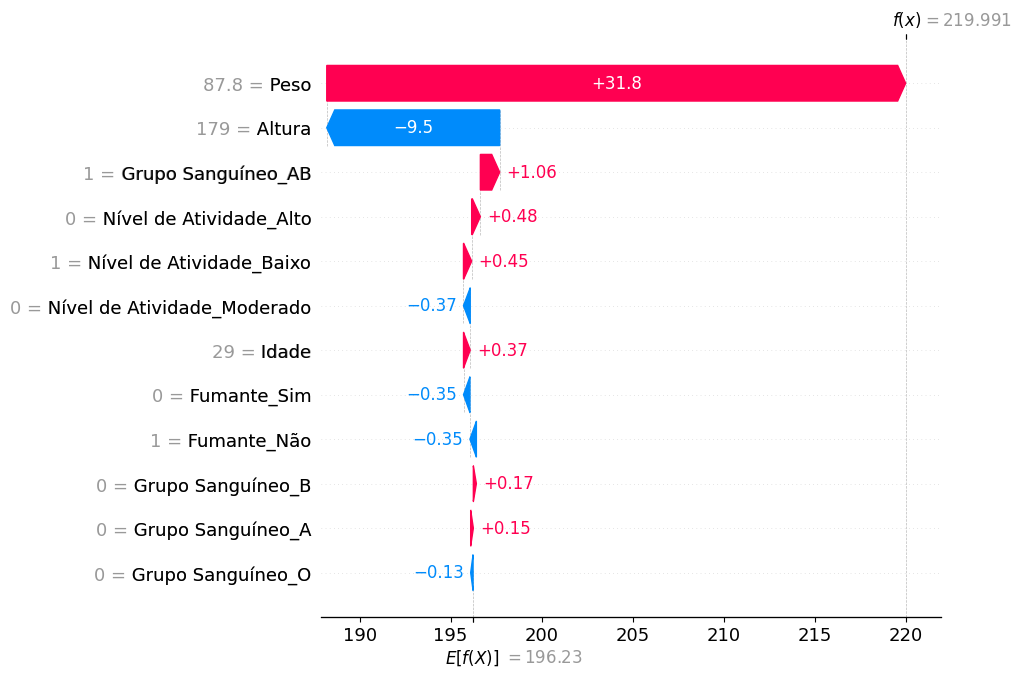

In [54]:
# plotar os shap values para um exemplo específico
shap.plots.waterfall(shap_values_reg[0], max_display=13)

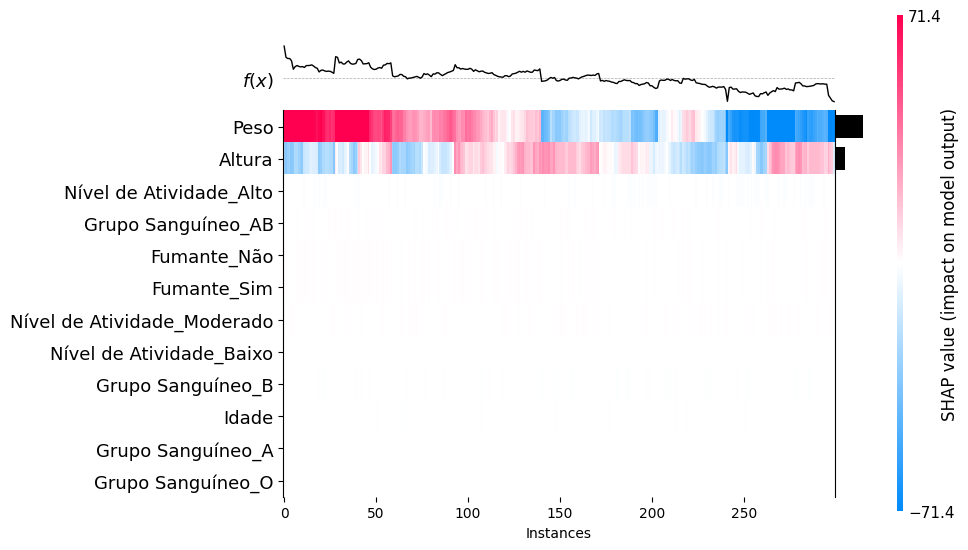

<Axes: xlabel='Instances'>

In [55]:
# plotar heatmap geral
shap.plots.heatmap(shap_values_reg, max_display=13)


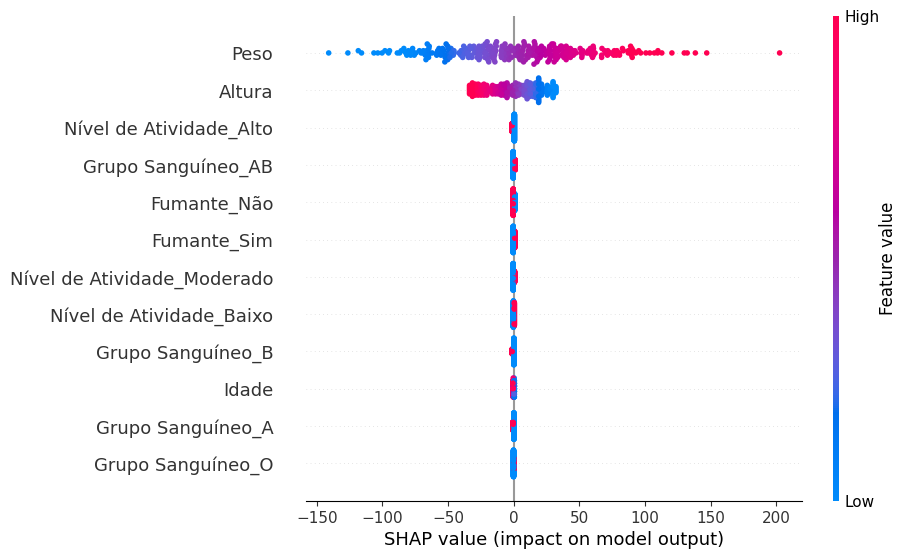

In [56]:
# plotar Beewswarm Geral
shap.plots.beeswarm(shap_values_reg, max_display=13)

### Shapley Values - Classificação
Neste vídeo, vamos aplicar o conceito de Shapley Values a um modelo de classificação. Vamos treinar um modelo de regressão logística e, em seguida, usar o Explainer Class para analisar as contribuições das variáveis para as previsões do modelo. Veremos que o tamanho é a variável que mais contribui, seguida pela doçura e suculência. Também analisaremos a contribuição de cada variável para uma instância específica do conjunto de testes. Utilizaremos gráficos como o Feature Importance, Hitmap e Bee Swarm para visualizar essas contribuições. Com isso, concluímos mais um módulo prático sobre Shapley Values.

In [57]:
df2_shapley = pd.read_csv(filepath_or_buffer='../../datasets/dataset_fruit_quality.csv')
df2_shapley.drop(labels='A_id', axis=1, inplace=True)
df2_shapley['Quality'] = (df2_shapley['Quality'] == 'good').astype(dtype=int)
df2_shapley
df_shapley 

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33.0,85.1,186.0,199.63,0,0,1,0,0,1,0,1,0
1,68.0,105.0,184.0,236.98,1,0,0,0,1,0,0,0,1
2,25.0,64.8,180.0,161.79,0,0,0,1,1,0,1,0,0
3,43.0,120.2,167.0,336.24,1,0,0,0,1,0,1,0,0
4,79.0,88.5,175.0,226.23,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31.0,68.1,166.0,206.81,0,1,0,0,0,1,0,0,1
996,51.0,47.7,170.0,128.03,0,0,0,1,1,0,1,0,0
997,39.0,85.5,176.0,211.14,0,1,0,0,1,0,0,1,0
998,61.0,91.2,161.0,284.53,0,1,0,0,0,1,0,1,0


In [58]:
# treinar modelo de regressão Logística
X_df2 = df2_shapley.drop(labels="Quality", axis=1)
y_df2 = df2_shapley['Quality']

# separar treino e teste
X_df2_train,  X_df2_test, y_df2_train, y_df2_test = train_test_split(
    X_df2, y_df2, test_size=0.3, random_state=51)

model_logr_shapley = LogisticRegression()
model_logr_shapley.fit(X=X_df2_train, y=y_df2_train)

LogisticRegression()

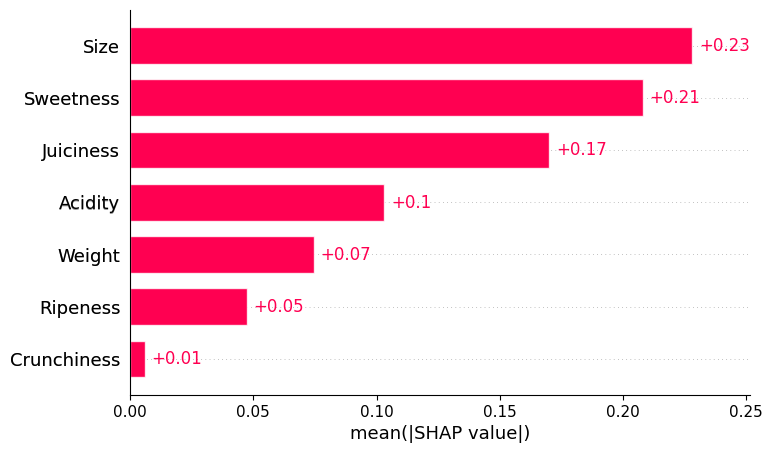

In [59]:
# rodar o explaniner no conjunto de treinamento
explainer_reg_logr = shap.Explainer(
    model=model_logr_shapley.predict, masker=X_df2_train)

# calcular shapley values no conjunto de testes
shap_values_reg_logr = explainer_reg_logr(X_df2_test)

# plotar a contribuição por shap values
shap.plots.bar(shap_values_reg_logr)

In [60]:
# mostrar a primeira instância do conjunto de testes
X_df2_test.iloc[0, :]

Size           1.819744
Weight        -1.174086
Sweetness     -2.772288
Crunchiness   -0.039636
Juiciness     -1.437848
Ripeness       1.648811
Acidity       -1.098697
Name: 1150, dtype: float64

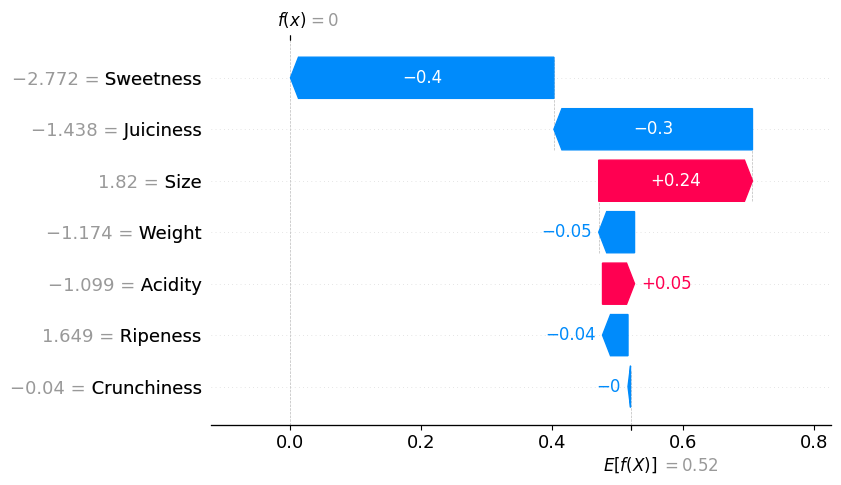

In [61]:
# plotar os shap values para um exemplo específico
shap.plots.waterfall(shap_values_reg_logr[0], max_display=7)

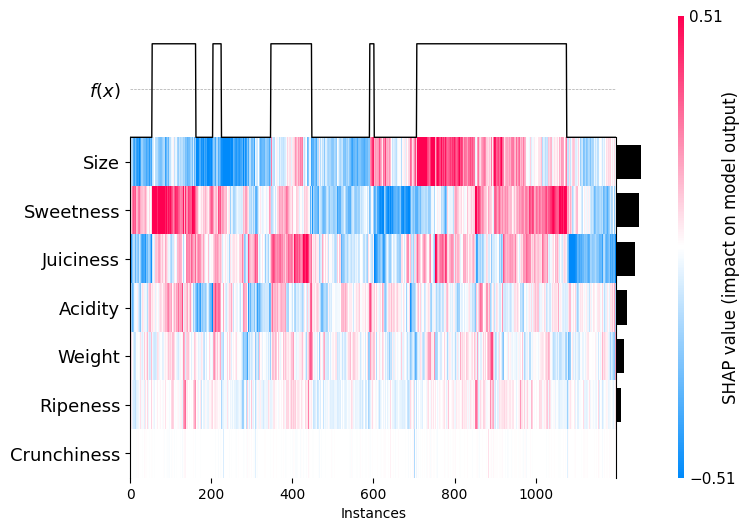

<Axes: xlabel='Instances'>

In [62]:
# plotar heatmap geral
shap.plots.heatmap(shap_values_reg_logr, max_display=7)

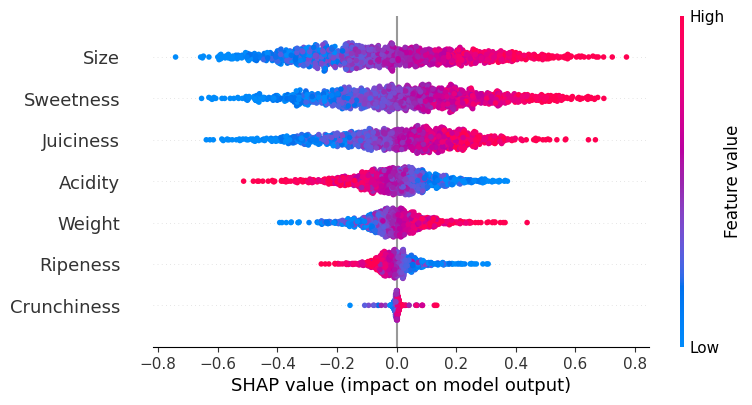

In [63]:
# plotar Beewswarm Geral
shap.plots.beeswarm(shap_values_reg_logr, max_display=7)